In [ ]:
#Importing Libraries

import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import io
warnings.simplefilter("ignore")


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Language Detection.csv to Language Detection (1).csv


In [ ]:
data = pd.read_csv(io.BytesIO(uploaded['Language Detection.csv']) )

data.head(10)

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English
5,"[2] In ancient philosophy, natura is mostly us...",English
6,"[3][4] \nThe concept of nature as a whole, the...",English
7,During the advent of modern scientific method ...,English
8,"[5][6] With the Industrial revolution, nature ...",English
9,"However, a vitalist vision of nature, closer t...",English


In [ ]:
data["Language"].value_counts()

English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: Language, dtype: int64

In [ ]:
X = data["Text"]
y = data["Language"]

In [ ]:
#label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
#text preprocessing
# creating a list for appending the preprocessed text
data_list = []
# iterating through all the text
for text in X:
       # removing the symbols and numbers
        text = re.sub(r'[!@#$(),n"%^*?:;~`0-9]', ' ', text)
        text = re.sub(r'[[]]', ' ', text)
        # converting the text to lower case
        text = text.lower()
        # appending to data_list
        data_list.append(text)

In [ ]:
#/using Bag-of-words to convert input into numerical form
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(data_list).toarray()
X.shape 

(10337, 34937)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy is :",ac)

Accuracy is : 0.9796905222437138


Accuracy of model = 0.97

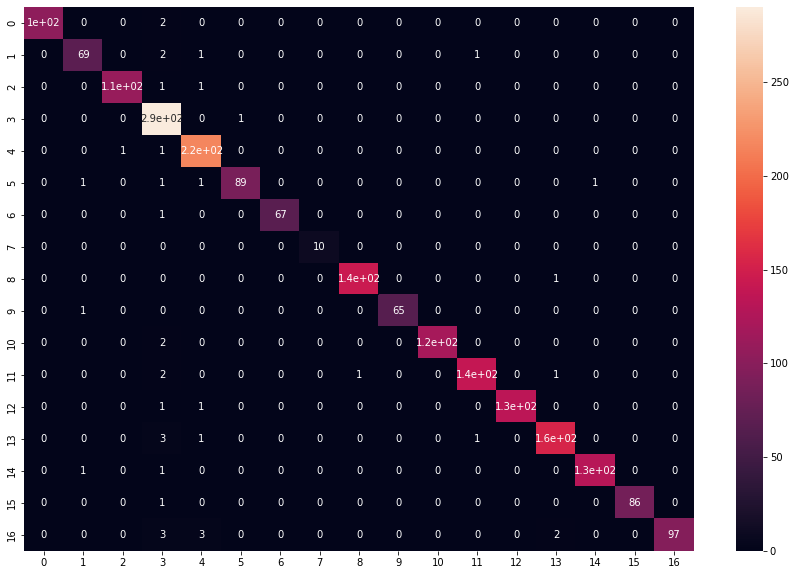

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot = True)
plt.show()

In [ ]:

def predict(text):
     x = cv.transform([text]).toarray() # converting text to bag of words model (Vector)
     lang = model.predict(x) # predicting the language
     lang = le.inverse_transform(lang) # finding the language corresponding the the predicted value
     print("The langauge is in",lang[0]) # printing the language
     

Checking the model prediction

In [ ]:
# English
predict("LANGUAGE DETECTION MODEL CHECK")
# French
predict("VÉRIFICATION DU MODÈLE DE DÉTECTION DE LA LANGUE")
# Arabic
predict("توففحص نموذج الكشف عن اللغة")
# Spanish
predict("VERIFICACIÓN DEL MODELO DE DETECCIÓN DE IDIOMAS")
# Malayalam
predict("ലാംഗ്വേജ് ഡിറ്റക്ഷൻ മോഡൽ ചെക്ക്")
# Russian
predict("ПРОВЕРКА МОДЕЛИ ОПРЕДЕЛЕНИЯ ЯЗЫКА")
# Hindi
predict('भाषा का पता लगाने वाले मॉडल की जांच')
# Hindi
predict(' boyit9h एनालिटिक्स alhgserog 90980879809 bguytfivb ahgseporiga प्रदान करता है')

The langauge is in 3
The langauge is in 4
The langauge is in 0
The langauge is in 13
The langauge is in 10
The langauge is in 12
The langauge is in 7
The langauge is in 7
